<a href="https://colab.research.google.com/github/yingzibu/MOL2ADMET/blob/main/results/JAK_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/Yimeng-Wang/JAK-MTATFP.git --quiet

In [14]:
cd /content/JAK-MTATFP/Data/

/content/JAK-MTATFP/Data


In [15]:
ls

Anastassiadis.csv  jak_extest.bin            JAK_test.csv   JAK_valid.csv     train_dataset.bin
Davis.csv          JAK_inhibitor_series.csv  JAK_train.csv  test_dataset.bin  valid_dataset.bin


In [16]:
import pandas as pd

def process_jak(df):
    df_ = df.copy()[['SMILES', 'pIC50_JAK1', 'pIC50_JAK2',
                     'pIC50_JAK3', 'pIC50_TYK2']]

    df_ = df_.rename(columns={'SMILES': 'Drug',
                             'pIC50_JAK1': 'jak1',
                             'pIC50_JAK2': 'jak2',
                             'pIC50_JAK3': 'jak3',
                             'pIC50_TYK2': 'tyk2'})
    return df_


jak_trn = pd.read_csv('JAK_train.csv')
jak_val = pd.read_csv('JAK_valid.csv')
jak_tst = pd.read_csv('JAK_test.csv')

trn, val, tst = process_jak(jak_trn), process_jak(jak_val), process_jak(jak_tst)
len(trn), len(val), len(tst)

(10823, 1529, 1544)

In [ ]:
! pip install rdkit --quiet
! pip install PyTDC --quiet
! pip install mycolorpy --quiet
! pip install selfies  --quiet
! pip install pubchempy --quiet
! pip install dgllife --quiet
! pip install molvs --quiet
! pip install dgl -f https://data.dgl.ai/wheels/cu121/repo.html --quiet
! pip install dglgo -f https://data.dgl.ai/wheels-test/repo.html --quiet
! pip install DeepPurpose --quiet
! pip install git+https://github.com/bp-kelley/descriptastorus --quiet
! pip install pandas-flavor --quiet

In [17]:
cd /content/drive/MyDrive/ADMET

/content/drive/MyDrive/ADMET


In [5]:
from scripts.func_utils import make_path, convert_with_qed_sa, get_min, \
                                plot_loss, plot_performance

from scripts.eval_utils import *
from scripts.preprocess_mols import *
from scripts.model_architecture import *
from scripts.dataset import *
from scripts.train import *
import yaml
import pandas as pd
from scripts.get_vocab import *

from tdc.single_pred import ADME
from tdc.single_pred import Tox
from scripts.CONSTANT import *
from scripts.yaml_utils import *
from scripts.TRAIN import *
from scripts.MUE import *

print('VOCAB TYPE:', VOCAB_TYPE)

VOCAB TYPE: smiles


In [20]:
model_type = 'MLP'
names = ['jak1', 'jak2', 'jak3', 'tyk2']
config = get_config(model_type, names, IS_R_default=True)

['jak1', 'jak2', 'jak3', 'tyk2'] not in names_dict, assume reg task: True


In [22]:
trn_l, val_l, tst_l, vocab = get_multi_loader(trn, val, tst, config)

---> loader for ['jak1', 'jak2', 'jak3', 'tyk2']
--> preparing data loader for model type  MLP
---> converting SMILES to MACCS...
---> FINISHED
--> preparing data loader for model type  MLP
---> converting SMILES to MACCS...
---> FINISHED
--> preparing data loader for model type  MLP
---> converting SMILES to MACCS...
---> FINISHED


Model type:  MLP | Model parameters:  32436
Start training MLP...
Epoch:0 [Train] Loss: 2.633 | [Valid] Loss: 1.443	SAVE MODEL: loss: inf -> 1.443 | runtime: 0.331 ms
Epoch:1 [Train] Loss: 1.438 | [Valid] Loss: 1.295	SAVE MODEL: loss: 1.443 -> 1.295 | runtime: 0.192 ms
Epoch:2 [Train] Loss: 1.322 | [Valid] Loss: 1.153	SAVE MODEL: loss: 1.295 -> 1.153 | runtime: 0.187 ms
Epoch:3 [Train] Loss: 1.247 | [Valid] Loss: 1.090	SAVE MODEL: loss: 1.153 -> 1.090 | runtime: 0.187 ms
Epoch:4 [Train] Loss: 1.180 | [Valid] Loss: 1.037	SAVE MODEL: loss: 1.090 -> 1.037 | runtime: 0.181 ms
Epoch:5 [Train] Loss: 1.115 | [Valid] Loss: 0.974	SAVE MODEL: loss: 1.037 -> 0.974 | runtime: 0.184 ms
Epoch:6 [Train] Loss: 1.059 | [Valid] Loss: 0.947	SAVE MODEL: loss: 0.974 -> 0.947 | runtime: 0.188 ms
Epoch:7 [Train] Loss: 1.013 | [Valid] Loss: 0.884	SAVE MODEL: loss: 0.947 -> 0.884 | runtime: 0.192 ms
Epoch:8 [Train] Loss: 0.963 | [Valid] Loss: 0.861	SAVE MODEL: loss: 0.884 -> 0.861 | runtime: 0.196 ms
Epoch:9 [

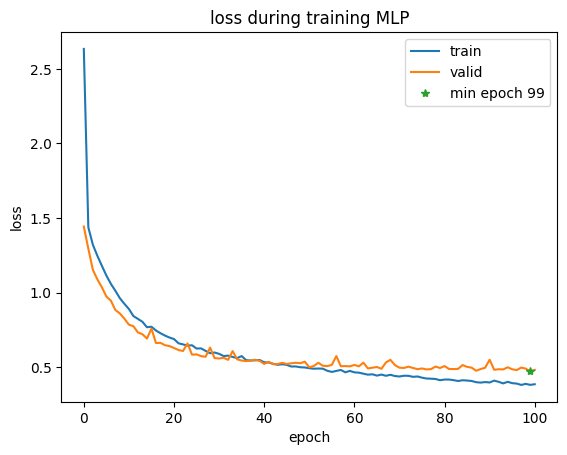

*************** jak1 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.529  &0.464  &0.681  &0.648  &0.806  &0.808

*************** jak2 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.569  &0.549  &0.741  &0.650  &0.808  &0.755

*************** jak3 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.583  &0.594  &0.770  &0.578  &0.763  &0.696

*************** tyk2 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.436  &0.318  &0.564  &0.591  &0.770  &0.733

Epoch:101 [Train] Loss: 0.381 | [Valid] Loss: 0.487	EarlyStopping counter: 2 out of 30
Epoch:102 [Train] Loss: 0.391 | [Valid] Loss: 0.509	EarlyStopping counter: 3 out of 30
Epoch:103 [Train] Loss: 0.387 | [Valid] Loss: 0.518	EarlyStopping counter: 4 out of 30
Epoch:104 [Train] Loss: 0.383 | [Valid] Loss: 0.505	EarlyStopping counter: 5 out of 30
Epoch:105 [Train] Loss: 0.382 | [Valid] Loss: 0.487	EarlyStopping counter: 6 out of 30
Epoch:106 [Train] Loss: 0

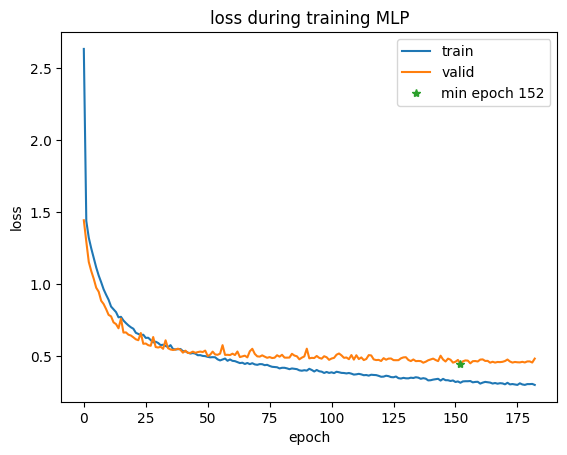

load pretrained model from  ckpt_MLP.pt
[Test] Loss: 0.433
*************** jak1 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.537  &0.512  &0.716  &0.654  &0.809  &0.804


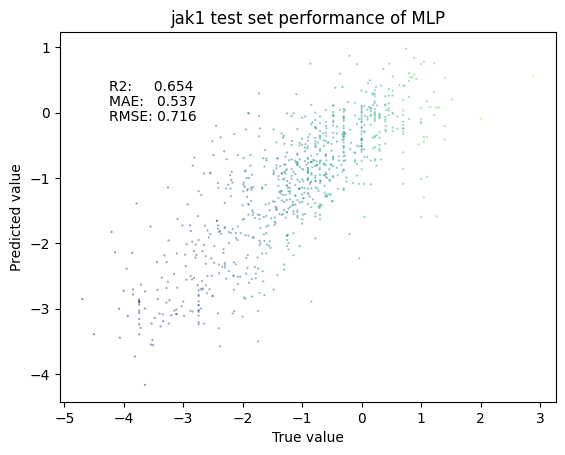


*************** jak2 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.571  &0.579  &0.761  &0.599  &0.778  &0.716


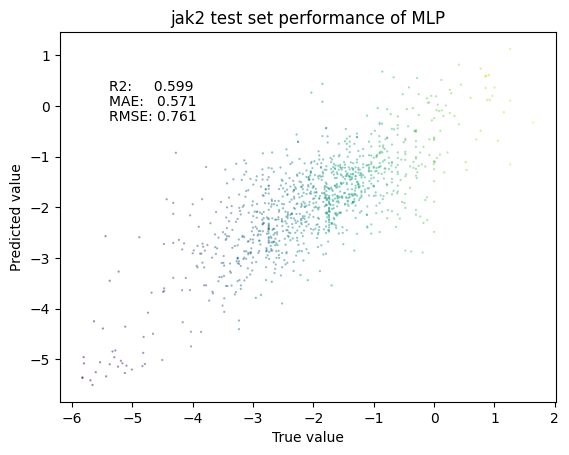


*************** jak3 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.503  &0.467  &0.684  &0.673  &0.821  &0.753


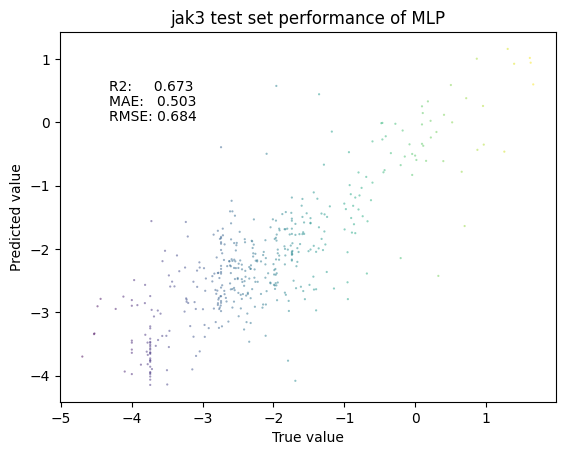


*************** tyk2 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.397  &0.312  &0.559  &0.542  &0.738  &0.721


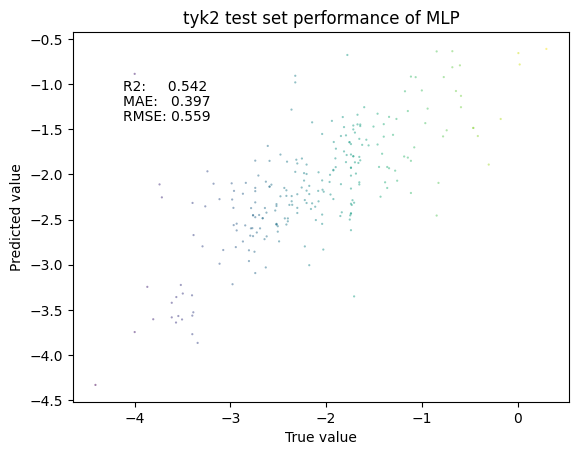



--> Train status saved at ckpt_MLP.yml
Finished evaluate test performance, outputs performance dict


In [23]:
models = PRED(**config)
p = models.train(trn_l, val_l, tst_l)

In [25]:
model_type = 'AttentiveFP'
names = ['jak1', 'jak2', 'jak3', 'tyk2']
config = get_config(model_type, names, IS_R_default=True)

['jak1', 'jak2', 'jak3', 'tyk2'] not in names_dict, assume reg task: True


In [27]:
trn_l, val_l, tst_l, vocab = get_multi_loader(trn, val, tst, config)

---> loader for ['jak1', 'jak2', 'jak3', 'tyk2']
--> preparing data loader for model type  AttentiveFP
Processing dgl graphs from scratch...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    5.2s
[Parallel(n_jobs=8)]: Done 2584 tasks      | elapsed:    7.7s
[Parallel(n_jobs=8)]: Done 10584 tasks      | elapsed:   14.7s
[Parallel(n_jobs=8)]: Done 10823 out of 10823 | elapsed:   14.8s finished


--> preparing data loader for model type  AttentiveFP
Processing dgl graphs from scratch...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  58 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1529 out of 1529 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


--> preparing data loader for model type  AttentiveFP
Processing dgl graphs from scratch...


[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1544 out of 1544 | elapsed:    1.3s finished


## AttentiveFP, no uncertainty weight

Model type:  AttentiveFP | Model parameters:  3824410
Start training AttentiveFP...
Epoch:0 [Train] Loss: 1.590 | [Valid] Loss: 1.337	SAVE MODEL: loss: inf -> 1.337 | runtime: 0.657 ms
Epoch:1 [Train] Loss: 1.340 | [Valid] Loss: 1.169	SAVE MODEL: loss: 1.337 -> 1.169 | runtime: 0.364 ms
Epoch:2 [Train] Loss: 1.250 | [Valid] Loss: 1.149	SAVE MODEL: loss: 1.169 -> 1.149 | runtime: 0.368 ms
Epoch:3 [Train] Loss: 1.227 | [Valid] Loss: 1.143	SAVE MODEL: loss: 1.149 -> 1.143 | runtime: 0.367 ms
Epoch:4 [Train] Loss: 1.172 | [Valid] Loss: 1.093	SAVE MODEL: loss: 1.143 -> 1.093 | runtime: 0.369 ms
Epoch:5 [Train] Loss: 1.135 | [Valid] Loss: 1.052	SAVE MODEL: loss: 1.093 -> 1.052 | runtime: 0.372 ms
Epoch:6 [Train] Loss: 1.085 | [Valid] Loss: 1.009	SAVE MODEL: loss: 1.052 -> 1.009 | runtime: 0.371 ms
Epoch:7 [Train] Loss: 1.051 | [Valid] Loss: 0.996	SAVE MODEL: loss: 1.009 -> 0.996 | runtime: 0.372 ms
Epoch:8 [Train] Loss: 0.989 | [Valid] Loss: 0.947	SAVE MODEL: loss: 0.996 -> 0.947 | runtime: 

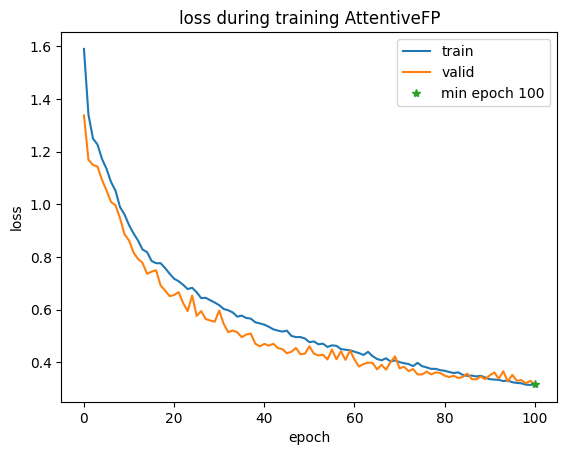

*************** jak1 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.427  &0.328  &0.573  &0.751  &0.867  &0.867

*************** jak2 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.456  &0.359  &0.599  &0.772  &0.881  &0.842

*************** jak3 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.468  &0.390  &0.625  &0.722  &0.851  &0.804

*************** tyk2 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.326  &0.190  &0.436  &0.756  &0.871  &0.855

Epoch:101 [Train] Loss: 0.314 | [Valid] Loss: 0.323	EarlyStopping counter: 1 out of 30
Epoch:102 [Train] Loss: 0.301 | [Valid] Loss: 0.331	EarlyStopping counter: 2 out of 30
Epoch:103 [Train] Loss: 0.305 | [Valid] Loss: 0.336	EarlyStopping counter: 3 out of 30
Epoch:104 [Train] Loss: 0.307 | [Valid] Loss: 0.320	EarlyStopping counter: 4 out of 30
Epoch:105 [Train] Loss: 0.300 | [Valid] Loss: 0.317	EarlyStopping counter: 5 out of 30
Epoch:106 [Train] Loss: 0

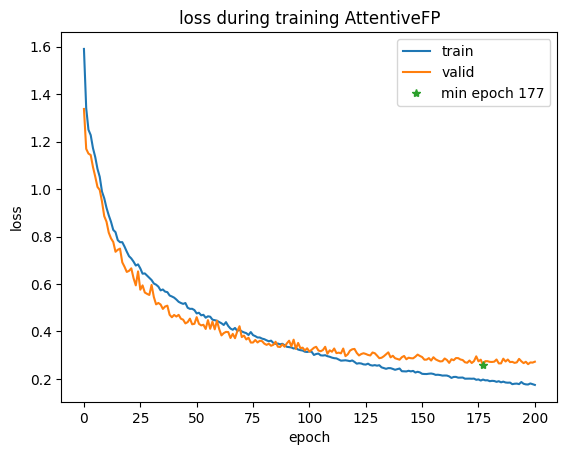

*************** jak1 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.375  &0.266  &0.516  &0.798  &0.897  &0.899

*************** jak2 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.398  &0.283  &0.532  &0.820  &0.907  &0.886

*************** jak3 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.434  &0.355  &0.596  &0.747  &0.868  &0.830

*************** tyk2 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.289  &0.177  &0.421  &0.772  &0.886  &0.862

Epoch:201 [Train] Loss: 0.171 | [Valid] Loss: 0.276	EarlyStopping counter: 24 out of 30
Epoch:202 [Train] Loss: 0.174 | [Valid] Loss: 0.269	EarlyStopping counter: 25 out of 30
Epoch:203 [Train] Loss: 0.170 | [Valid] Loss: 0.263	EarlyStopping counter: 26 out of 30
Epoch:204 [Train] Loss: 0.172 | [Valid] Loss: 0.267	EarlyStopping counter: 27 out of 30
Epoch:205 [Train] Loss: 0.171 | [Valid] Loss: 0.270	EarlyStopping counter: 28 out of 30
Epoch:206 [Train] Lo

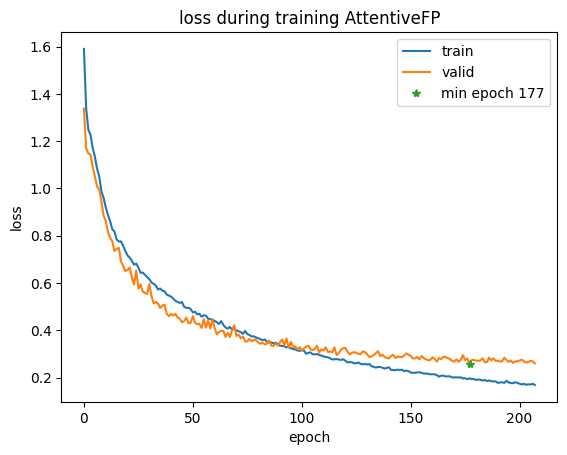

load pretrained model from  ckpt_AT.pt
[Test] Loss: 0.252
*************** jak1 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.386  &0.266  &0.516  &0.820  &0.906  &0.912


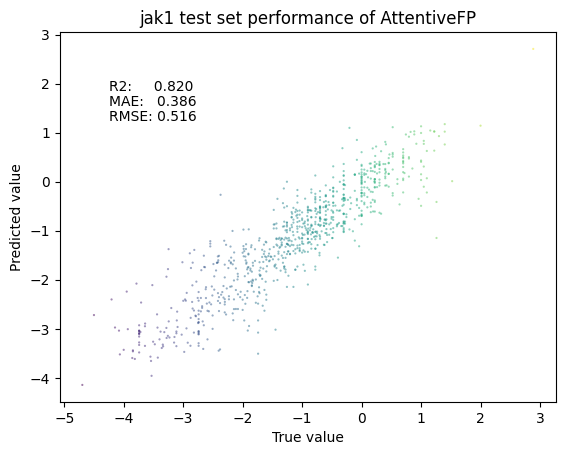


*************** jak2 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.394  &0.295  &0.543  &0.796  &0.894  &0.869


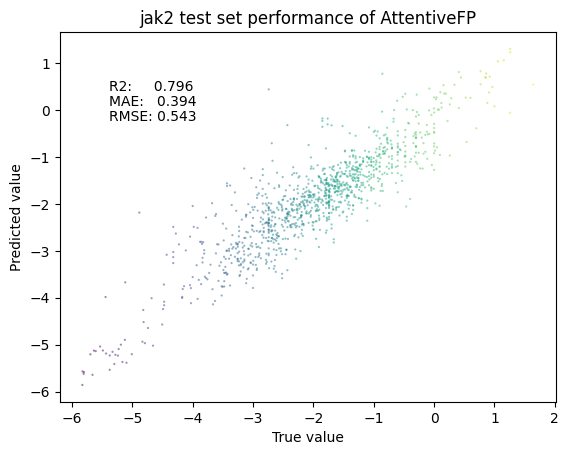


*************** jak3 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.414  &0.336  &0.580  &0.765  &0.875  &0.824


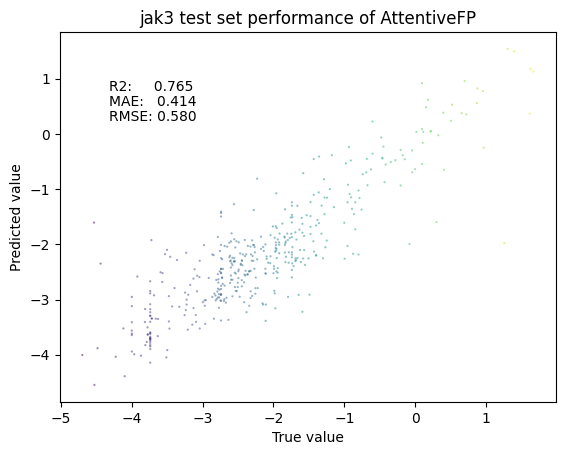


*************** tyk2 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.308  &0.186  &0.431  &0.727  &0.855  &0.831


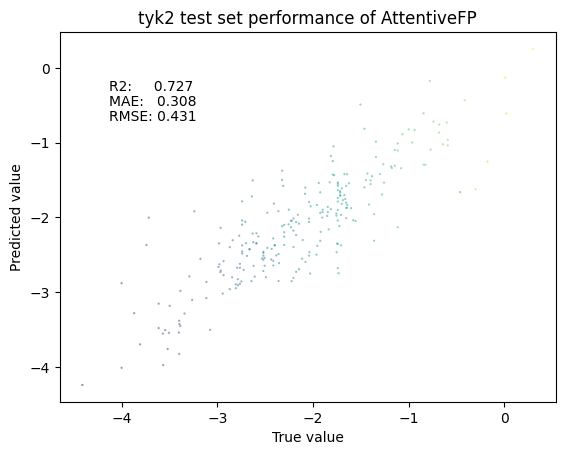



--> Train status saved at ckpt_AT.yml
Finished evaluate test performance, outputs performance dict


In [28]:
models = PRED(**config)
p = models.train(trn_l, val_l, tst_l)

## AttentiveFP add uncertainty weight

In [30]:
config['uncertainty_weight'] = True

Model type:  AttentiveFP | Model parameters:  3824410
Start training AttentiveFP...
Epoch:0 [Train] Loss: 1.668 | [Valid] Loss: 1.326	SAVE MODEL: loss: inf -> 1.326 | runtime: 0.370 ms
Epoch:1 [Train] Loss: 1.328 | [Valid] Loss: 1.026	SAVE MODEL: loss: 1.326 -> 1.026 | runtime: 0.365 ms
Epoch:2 [Train] Loss: 1.079 | [Valid] Loss: 1.033	EarlyStopping counter: 1 out of 30
Epoch:3 [Train] Loss: 1.051 | [Valid] Loss: 1.003	SAVE MODEL: loss: 1.026 -> 1.003 | runtime: 0.374 ms
Epoch:4 [Train] Loss: 1.034 | [Valid] Loss: 1.015	EarlyStopping counter: 1 out of 30
Epoch:5 [Train] Loss: 1.020 | [Valid] Loss: 0.991	SAVE MODEL: loss: 1.003 -> 0.991 | runtime: 0.373 ms
Epoch:6 [Train] Loss: 1.007 | [Valid] Loss: 0.977	SAVE MODEL: loss: 0.991 -> 0.977 | runtime: 0.374 ms
Epoch:7 [Train] Loss: 0.998 | [Valid] Loss: 0.941	SAVE MODEL: loss: 0.977 -> 0.941 | runtime: 0.372 ms
Epoch:8 [Train] Loss: 0.969 | [Valid] Loss: 0.941	EarlyStopping counter: 1 out of 30
Epoch:9 [Train] Loss: 0.925 | [Valid] Loss: 0

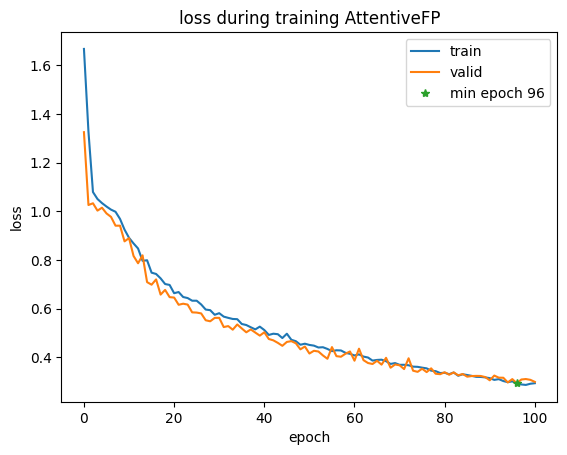

*************** jak1 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.434  &0.336  &0.579  &0.746  &0.864  &0.863

*************** jak2 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.469  &0.381  &0.617  &0.757  &0.870  &0.831

*************** jak3 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.489  &0.426  &0.653  &0.697  &0.842  &0.786

*************** tyk2 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.300  &0.178  &0.422  &0.771  &0.881  &0.863

Epoch:101 [Train] Loss: 0.281 | [Valid] Loss: 0.305	EarlyStopping counter: 5 out of 30
Epoch:102 [Train] Loss: 0.281 | [Valid] Loss: 0.312	EarlyStopping counter: 6 out of 30
Epoch:103 [Train] Loss: 0.278 | [Valid] Loss: 0.285	SAVE MODEL: loss: 0.293 -> 0.285 | runtime: 0.364 ms
Epoch:104 [Train] Loss: 0.279 | [Valid] Loss: 0.303	EarlyStopping counter: 1 out of 30
Epoch:105 [Train] Loss: 0.272 | [Valid] Loss: 0.289	EarlyStopping counter: 2 out of 30
Epoch:1

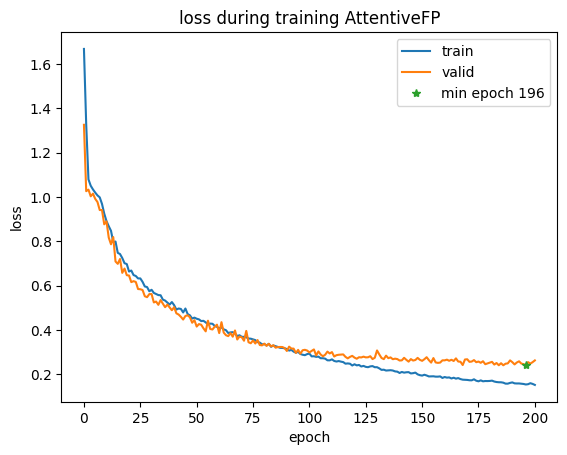

*************** jak1 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.376  &0.272  &0.522  &0.794  &0.893  &0.893

*************** jak2 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.413  &0.311  &0.557  &0.802  &0.900  &0.874

*************** jak3 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.466  &0.412  &0.642  &0.707  &0.851  &0.812

*************** tyk2 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.273  &0.165  &0.406  &0.788  &0.892  &0.871

Epoch:201 [Train] Loss: 0.153 | [Valid] Loss: 0.245	EarlyStopping counter: 5 out of 30
Epoch:202 [Train] Loss: 0.150 | [Valid] Loss: 0.244	EarlyStopping counter: 6 out of 30
Epoch:203 [Train] Loss: 0.151 | [Valid] Loss: 0.238	SAVE MODEL: loss: 0.240 -> 0.238 | runtime: 0.364 ms
Epoch:204 [Train] Loss: 0.152 | [Valid] Loss: 0.238	EarlyStopping counter: 1 out of 30
Epoch:205 [Train] Loss: 0.148 | [Valid] Loss: 0.243	EarlyStopping counter: 2 out of 30
Epoch:2

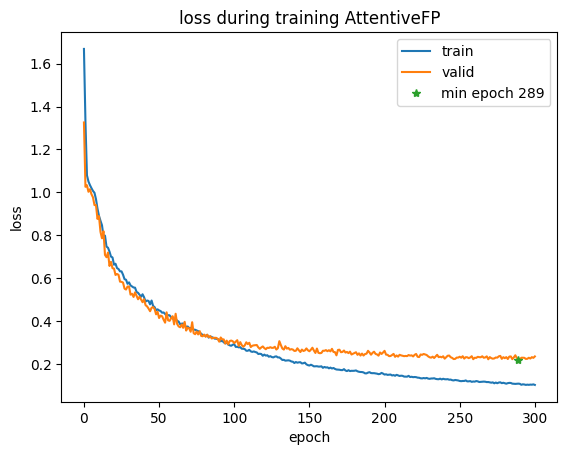

*************** jak1 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.355  &0.254  &0.504  &0.808  &0.901  &0.902

*************** jak2 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.385  &0.275  &0.525  &0.825  &0.909  &0.889

*************** jak3 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.436  &0.378  &0.615  &0.731  &0.859  &0.824

*************** tyk2 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.251  &0.151  &0.388  &0.806  &0.905  &0.888

Epoch:301 [Train] Loss: 0.104 | [Valid] Loss: 0.227	EarlyStopping counter: 12 out of 30
Epoch:302 [Train] Loss: 0.105 | [Valid] Loss: 0.223	EarlyStopping counter: 13 out of 30
Epoch:303 [Train] Loss: 0.102 | [Valid] Loss: 0.229	EarlyStopping counter: 14 out of 30
Epoch:304 [Train] Loss: 0.104 | [Valid] Loss: 0.232	EarlyStopping counter: 15 out of 30
Epoch:305 [Train] Loss: 0.104 | [Valid] Loss: 0.225	EarlyStopping counter: 16 out of 30
Epoch:306 [Train] Lo

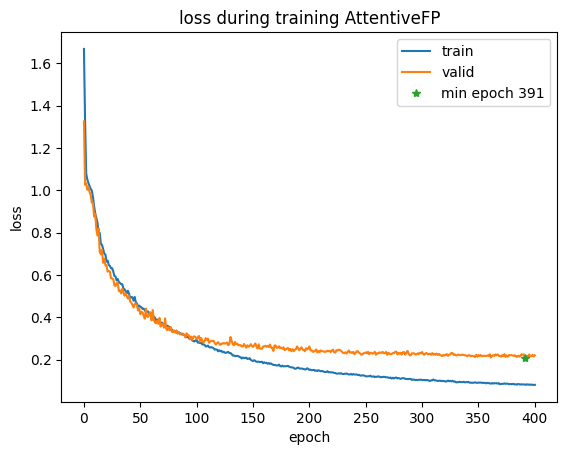

*************** jak1 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.342  &0.249  &0.499  &0.811  &0.902  &0.903

*************** jak2 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.376  &0.270  &0.519  &0.828  &0.911  &0.891

*************** jak3 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.435  &0.375  &0.613  &0.733  &0.863  &0.828

*************** tyk2 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.227  &0.131  &0.361  &0.832  &0.915  &0.901

Epoch:401 [Train] Loss: 0.082 | [Valid] Loss: 0.211	EarlyStopping counter: 10 out of 30
Epoch:402 [Train] Loss: 0.082 | [Valid] Loss: 0.216	EarlyStopping counter: 11 out of 30
Epoch:403 [Train] Loss: 0.081 | [Valid] Loss: 0.221	EarlyStopping counter: 12 out of 30
Epoch:404 [Train] Loss: 0.081 | [Valid] Loss: 0.220	EarlyStopping counter: 13 out of 30
Epoch:405 [Train] Loss: 0.079 | [Valid] Loss: 0.221	EarlyStopping counter: 14 out of 30
Epoch:406 [Train] Lo

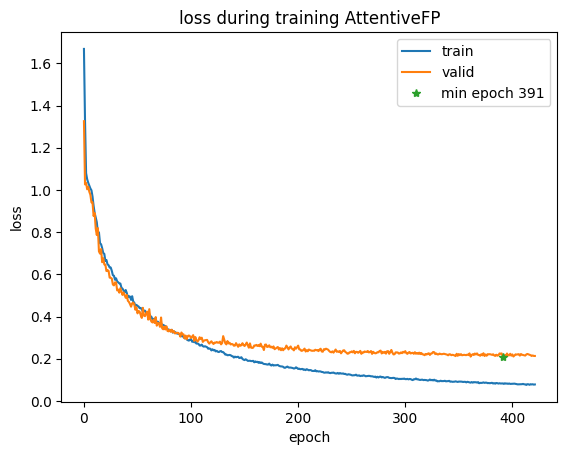

load pretrained model from  ckpt_AT.pt
[Test] Loss: 0.238
*************** jak1 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.350  &0.259  &0.509  &0.825  &0.908  &0.918


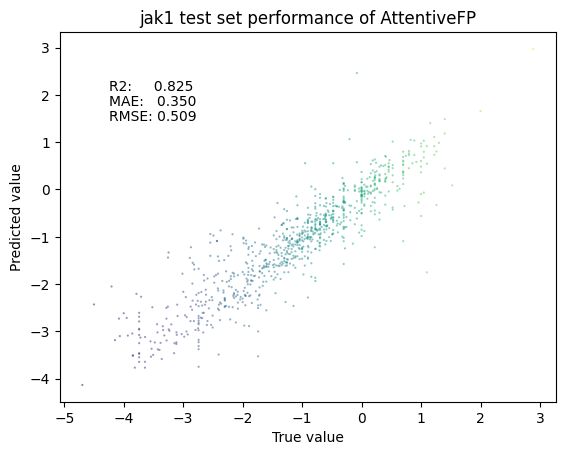


*************** jak2 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.362  &0.276  &0.525  &0.809  &0.902  &0.878


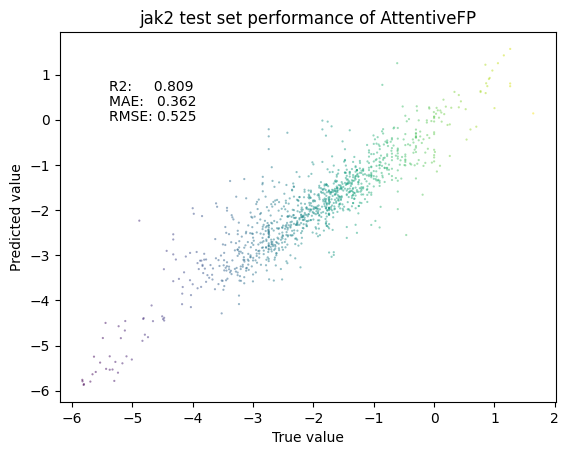


*************** jak3 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.400  &0.345  &0.588  &0.758  &0.872  &0.834


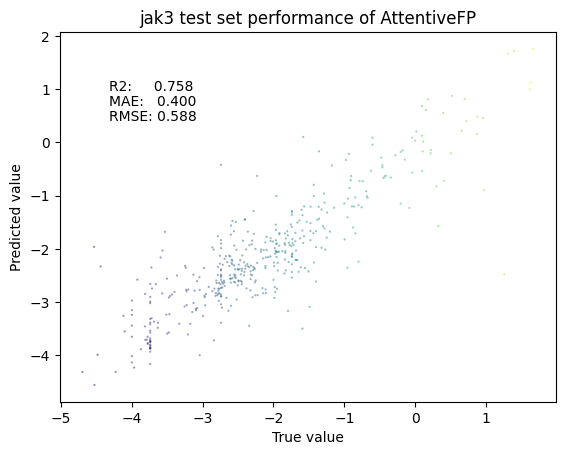


*************** tyk2 ***************
  MAE     MSE     RMSE    R2     pcc     spearman
&0.269  &0.181  &0.426  &0.734  &0.861  &0.849


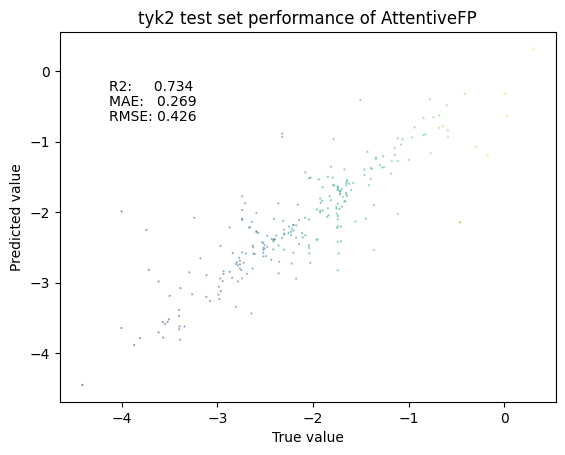



--> Train status saved at ckpt_AT.yml
Finished evaluate test performance, outputs performance dict


In [31]:
models = PRED(**config)
p = models.train(trn_l, val_l, tst_l)